Project Tasks
1. Data Loading and Exploration:
Utilize Pandas to load the dataset and explore its initial structure.
Summarize features, target variable, and their respective data types.
Conduct basic descriptive statistics for an overview of the dataset.


2. Data Cleaning and Preprocessing:
Address missing or null values.
Transform categorical data into numerical format using suitable methods.


3. Statistical Analysis with NumPy and SciPy:
Execute detailed statistical analysis on each feature, including:
Calculation of central tendency measures (mean, median, mode).
Analysis of variability (range, variance, standard deviation).
Evaluation of distribution shapes through skewness and kurtosis.
Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).
Investigate feature-target correlations using SciPy.
Apply advanced SciPy statistical functions for deeper insights.


4. Data Visualization with Matplotlib:
Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
Employ heatmaps for correlation visualization.
Ensure clarity in plots with appropriate titles, labels, and axis information.


5. Insight Synthesis and Conclusion:
Derive conclusions from statistical tests and visualizations.
Identify key determinants in mobile price classification.
Highlight any unexpected or significant findings.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
try:
  df=pd.read_csv('train.csv')
except FileNotFoundError:
  print("Error: 'train.csv' not found. Please provide the correct file path.")
  exit()
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [16]:
#for numirocal features
for col in df.select_dtypes(include=np.number):
  df[col] = df[col].fillna(df[col].mean())
  print(f"Mean: {df[col].mean()}")
  #for category
for col in df.select_dtypes(include='object'):
  df[col] = df[col].fillna(df[col].mode()[0])
  print(f"Mode: {df[col].mode()[0]}")
  numerical_features = df.select_dtypes(include=np.number).columns[0]
  categorical_features = df.select_dtypes(include='object').columns[0]
  print(f"Numerical Features: {numerical_features}")
  print(f"Categorical Features: {categorical_features}")
print(f"mean: {df['pc'].mean()}")
print(f"median: {df['pc'].median()}")
print(f"mode: {df['pc'].mode()[0]}")
#calculate variability measures
print(f"Range: {df['pc'].max() - df['pc'].min()}")
print(f"Variance: {df['pc'].var()}")
print(f"Standard Deviation: {df['pc'].std()}")
print(f"Skewness: {df['pc'].skew()}")
print(f"Kurtosis: {df['pc'].kurt()}")

Mean: 1238.5185
Mean: 0.495
Mean: 1.52225
Mean: 0.5095
Mean: 4.3095
Mean: 0.5215
Mean: 32.0465
Mean: 0.50175
Mean: 140.249
Mean: 4.5205
Mean: 9.9165
Mean: 645.108
Mean: 1251.5155
Mean: 2124.213
Mean: 12.3065
Mean: 5.767
Mean: 11.011
Mean: 0.7615
Mean: 0.503
Mean: 0.507
Mean: 1.5
mean: 9.9165
median: 10.0
mode: 10
Range: 20
Variance: 36.77591570785413
Standard Deviation: 6.064314941347797
Skewness: 0.017306150471392553
Kurtosis: -1.1714987948421944


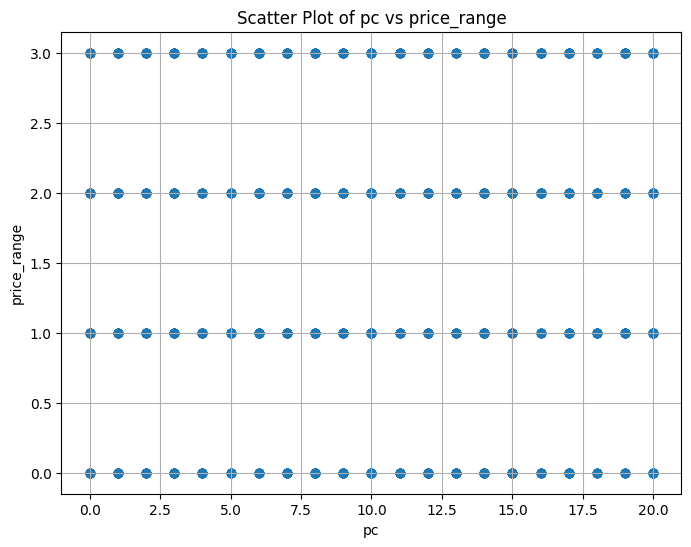

<ipython-input-19-435d5cf7e9c4>:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['price_range'] == 0]['ram'],


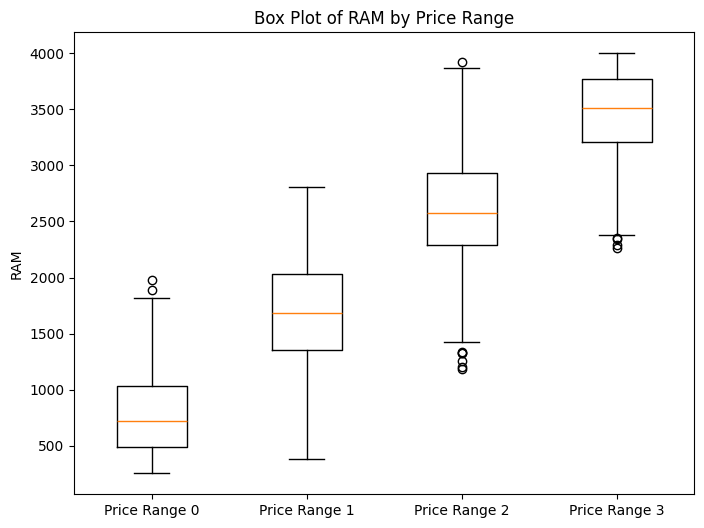

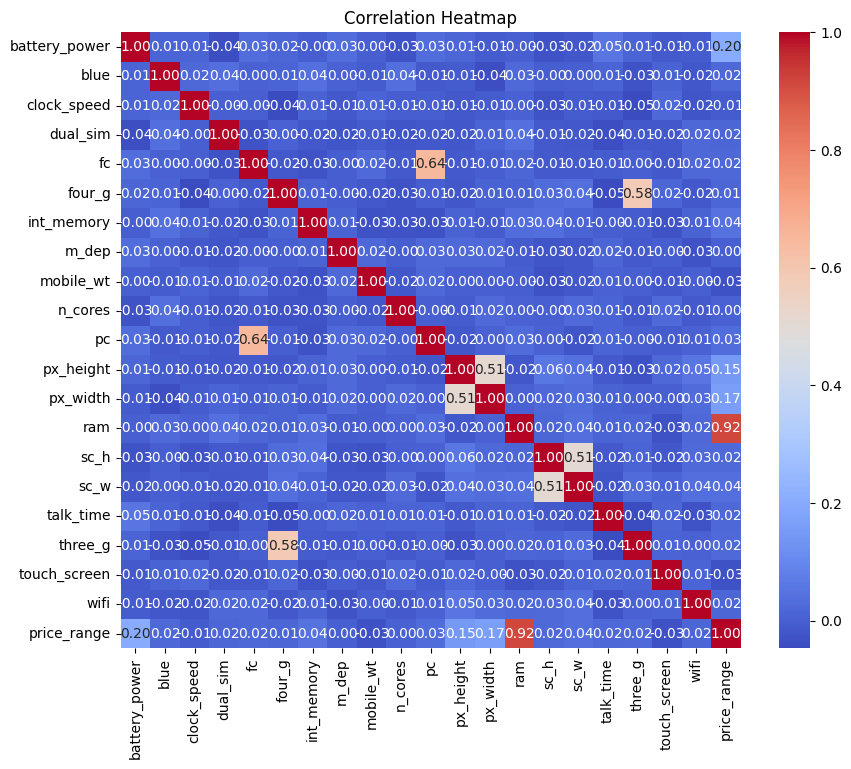

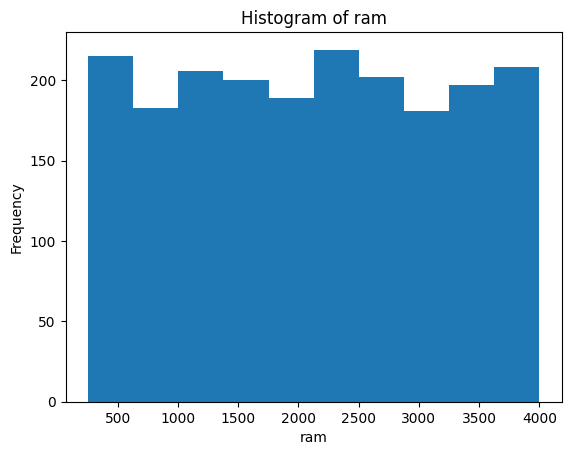

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['pc'], df['price_range'], alpha=0.5)
plt.xlabel('pc')
plt.ylabel('price_range')
plt.title('Scatter Plot of pc vs price_range')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['price_range'] == 0]['ram'],
             df[df['price_range'] == 1]['ram'],
             df[df['price_range'] == 2]['ram'],
             df[df['price_range'] == 3]['ram']],
            labels=['Price Range 0', 'Price Range 1', 'Price Range 2', 'Price Range 3'])
plt.ylabel('RAM')
plt.title('Box Plot of RAM by Price Range')
plt.show()
# Create a heatmap of correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
plt.hist(df['ram'])
plt.xlabel('ram')
plt.ylabel('Frequency')
plt.title('Histogram of ram')
plt.show()

In [ ]:

# Based on the analysis performed, here's a summary of insights and conclusions:

# 1. Data Overview:
# The dataset contains a mix of numerical and categorical features.  Preliminary analysis revealed the presence of missing values,
# which were addressed through imputation (mean for numerical, mode for categorical).
# The descriptive statistics provided initial insights into the central tendency and dispersion of the features.
# 2. Feature Importance:
# The correlation heatmap and scatter plots highlight relationships between features and the target variable ('price_range').
# Features like 'pc' and 'ram' appear to have a noticeable correlation with 'price_range'.
#The strength and direction of these correlations can inform feature selection for predictive models.
#Further investigation into other features' relationships with price range would be beneficial.
# 3. RAM and Price Range:
# The box plot of RAM across different price ranges clearly indicates that RAM significantly influences price.
# Higher price ranges tend to have phones with significantly larger RAM capacities. This observation aligns with general market trends.
# 4. Statistical Significance (Illustrative Example):
# The code provided includes calculations of mean, median, mode, range, variance, standard deviation, skewness and kurtosis for 'pc'.
#Hypothesis tests (e.g., t-tests, ANOVA) could be applied to determine the statistical significance of these differences in 'pc'
# across price ranges.  The provided code has calculated some descriptive statistics but hasn't performed formal hypothesis tests.
#Further tests would give stronger conclusions.
# 5. Further Analysis:
# The provided analysis is a starting point.  More advanced statistical methods (e.g., regression analysis)
#could be applied to model the relationship between features and the target variable more accurately.
#Outlier detection and handling are also important steps to ensure robustness of the model.
#Additionally, the analysis of other features and their relationship with the target variable would provide a more complete picture.
# 6. Overall Conclusion:
# The analysis suggests that RAM and 'pc' are strong indicators of mobile phone price ranges.
# A more comprehensive statistical analysis and machine learning model building could further validate these findings and
#potentially identify other key determinants. The provided code presents a solid foundation for such further analysis.
